In [8]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

In [47]:
df = pd.read_csv('cleaned_en_mc_scaled.csv')

In [48]:
df.head()

,DOM,followers,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,constructionTime,ladderRatio,...,district_8.0,district_9.0,district_10.0,district_11.0,district_12.0,district_13.0,floorType_0.0,floorType_1.0,floorType_3.0,floorType_4.0
0,0.872912,0.092738,0.084675,0.195422,0.250,0.2,0.333333,0.142857,0.833333,2.028094e-08,...,0,0,0,0,0,0,0,0,1,0
1,0.538186,0.110236,0.117329,0.197604,0.250,0.4,0.333333,0.285714,0.818182,6.523868e-08,...,0,0,0,0,0,0,0,0,1,0
2,0.757757,0.041995,0.210188,0.301329,0.375,0.4,0.333333,0.428571,0.833333,4.855436e-08,...,0,0,0,0,0,0,0,0,0,0
3,0.575179,0.120735,0.060695,0.200164,0.375,0.2,0.333333,0.142857,0.878788,2.587568e-08,...,0,0,0,0,0,0,1,0,0,0
4,0.552506,0.250219,0.079981,0.116387,0.250,0.2,0.333333,0.142857,0.151515,3.187004e-08,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314087 entries, 0 to 314086
Data columns (total 45 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   DOM                      314087 non-null  float64
 1   followers                314087 non-null  float64
 2   totalPrice               314087 non-null  float64
 3   square                   314087 non-null  float64
 4   livingRoom               314087 non-null  float64
 5   drawingRoom              314087 non-null  float64
 6   kitchen                  314087 non-null  float64
 7   bathRoom                 314087 non-null  float64
 8   constructionTime         314087 non-null  float64
 9   ladderRatio              314087 non-null  float64
 10  communityAverage         314087 non-null  float64
 11  tradeTime_month_sin      314087 non-null  float64
 12  tradeTime_month_cos      314087 non-null  float64
 13  floorHeight              314087 non-null  float64
 14  pric

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
from statsmodels.api import add_constant

In [19]:
X = df.drop(['price', 'totalPrice'], axis=1)
y = df['price']

# Add constant for intercept
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

In [20]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                 1.244e+04
Date:                Sat, 05 Apr 2025   Prob (F-statistic):               0.00
Time:                        18:03:02   Log-Likelihood:             3.3222e+05
No. Observations:              314087   AIC:                        -6.644e+05
Df Residuals:                  314043   BIC:                        -6.639e+05
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0783      0.002     31.352      0.000       0.073       0.083
DOM                         1.0152      0.008    128.286      0.000       1.000       1.031
followers                   0.5545      0.006     93.133      0.000       0.543       0.566
square                     -0.2410      0.006    -43.033      0.000      -0.252      -0.230
livingRoom                  0.0226      0.003      8.965      0.000       0.018       0.028
drawingRoom                -0.0079      0.002     -4.212      0.000      -0.012      -0.004
kitchen                     0.0705      0.005     15.231      0.000       0.061       0.080
bathRoom                    0.0615      0.004     16.722      0.000       0.054       0.069
constructionTime           -0.0126      0.002     -7.499      0.000      -0.016      -0.009
ladderRatio                 0.0875      0.059      1.472      0.141      -0.029       0.204
communityAverage            0.7003      0.002    327.302      0.000       0.696       0.705
tradeTime_month_sin         0.0156      0.000     37.078      0.000       0.015       0.016
tradeTime_month_cos         0.0137      0.000     31.503      0.000       0.013       0.015
floorHeight                -0.0050      0.001     -4.388      0.000      -0.007      -0.003
buildingType_1.0           -0.0083      0.001    -16.231      0.000      -0.009      -0.007
buildingType_2.0            0.1108      0.015      7.222      0.000       0.081       0.141
buildingType_3.0           -0.0077      0.001    -14.686      0.000      -0.009      -0.007
renovationCondition_1.0    -0.0749      0.000   -204.836      0.000      -0.076      -0.074
renovationCondition_2.0    -0.0236      0.001    -19.597      0.000      -0.026      -0.021
renovationCondition_3.0    -0.0035      0.000     -8.702      0.000      -0.004      -0.003
buildingStructure_1.0       0.0083      0.013      0.652      0.514      -0.017       0.033
buildingStructure_2.0      -0.0004      0.001     -0.584      0.559      -0.002       0.001
buildingStructure_3.0       0.0903      0.013      6.935      0.000       0.065       0.116
buildingStructure_4.0      -0.0054      0.001     -5.779      0.000      -0.007      -0.004
buildingStructure_5.0      -0.0032      0.007     -0.478      0.633      -0.016       0.010
elevator_1.0                0.0053      0.001      8.070      0.000       0.004       0.007
fiveYearsProperty_1.0      -0.0211      0.000    -63.703      0.000      -0.022      -0.020
subway_1.0                  0.0032      0.000      9.594      0.000       0.003       0.004
district_2.0               -0.0010      0.001     -1.136      0.256      -0.003       0.001
district_3.0               -0.0052      0.002     -2.205      0.027      -0.010      -0.001
district_4.0               -0.0064      0.001  

In [21]:
# Get predicted values
y_pred = model.predict(X)

# Calculate RMSE
rmse = np.sqrt(np.mean((y - y_pred) ** 2))

In [22]:
rmse

0.08402117950328576

In [23]:
# Calculate RMSLE
log_true = np.log1p(y)  # log(1 + y_true)
log_pred = np.log1p(y_pred)  # log(1 + y_pred)
rmsle = np.sqrt(np.mean((log_true - log_pred) ** 2))

In [24]:
rmsle

0.06148175386563462

In [25]:
X['square_2'] = X['square'] ** 2

In [26]:
X['constructionTime_2'] = X['constructionTime'] ** 2

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [28]:
# After fixes, recalculate:
vif = [variance_inflation_factor(X.values, i) 
       for i in range(X.shape[1])]

pd.DataFrame({
    'Feature': X.columns,
    'VIF': vif
}).sort_values('VIF', ascending=False)

,Feature,VIF
0,const,590.543411
45,constructionTime_2,59.473041
8,constructionTime,56.970200
3,square,16.737818
44,square_2,9.931328
33,district_7.0,6.042073
32,district_6.0,4.640405
25,elevator_1.0,4.631144
21,buildingStructure_2.0,3.815023
10,communityAverage,3.411826


In [29]:
X_1 = X.drop(['square', 'constructionTime'], axis=1)

In [30]:
vif = [variance_inflation_factor(X_1.values, i) 
       for i in range(X_1.shape[1])]

pd.DataFrame({
    'Feature': X_1.columns,
    'VIF': vif
}).sort_values('VIF', ascending=False)

,Feature,VIF
0,const,228.065074
31,district_7.0,6.038913
30,district_6.0,4.628833
23,elevator_1.0,4.599920
19,buildingStructure_2.0,3.770586
8,communityAverage,3.384425
26,district_2.0,3.195168
32,district_8.0,3.001640
34,district_10.0,2.694440
42,square_2,2.660094


In [31]:
model = sm.OLS(y, X_1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                 1.238e+04
Date:                Mon, 07 Apr 2025   Prob (F-statistic):               0.00
Time:                        11:07:39   Log-Likelihood:             3.3172e+05
No. Observations:              314087   AIC:                        -6.634e+05
Df Residuals:                  314043   BIC:                        -6.629e+05
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0730      0.002     32.169      0.000       0.069       0.077
DOM                         1.0063      0.008    127.024      0.000       0.991       1.022
followers                   0.5647      0.006     94.854      0.000       0.553       0.576
livingRoom                 -0.0161      0.002     -7.341      0.000      -0.020      -0.012
drawingRoom                -0.0253      0.002    -13.917      0.000      -0.029      -0.022
kitchen                     0.0731      0.005     15.771      0.000       0.064       0.082
bathRoom                    0.0417      0.004     11.211      0.000       0.034       0.049
ladderRatio                 0.0893      0.060      1.500      0.134      -0.027       0.206
communityAverage            0.7048      0.002    329.507      0.000       0.701       0.709
tradeTime_month_sin         0.0156      0.000     36.896      0.000       0.015       0.016
tradeTime_month_cos         0.0136      0.000     31.322      0.000       0.013       0.014
floorHeight                -0.0049      0.001     -4.253      0.000      -0.007      -0.003
buildingType_1.0           -0.0091      0.001    -17.625      0.000      -0.010      -0.008
buildingType_2.0            0.1130      0.015      7.353      0.000       0.083       0.143
buildingType_3.0           -0.0079      0.001    -15.116      0.000      -0.009      -0.007
renovationCondition_1.0    -0.0748      0.000   -204.078      0.000      -0.076      -0.074
renovationCondition_2.0    -0.0225      0.001    -18.622      0.000      -0.025      -0.020
renovationCondition_3.0    -0.0032      0.000     -7.906      0.000      -0.004      -0.002
buildingStructure_1.0       0.0095      0.013      0.750      0.453      -0.015       0.034
buildingStructure_2.0      -0.0006      0.001     -0.916      0.360      -0.002       0.001
buildingStructure_3.0       0.0923      0.013      7.078      0.000       0.067       0.118
buildingStructure_4.0      -0.0052      0.001     -5.593      0.000      -0.007      -0.003
buildingStructure_5.0      -0.0040      0.007     -0.588      0.556      -0.017       0.009
elevator_1.0                0.0040      0.001      6.110      0.000       0.003       0.005
fiveYearsProperty_1.0      -0.0219      0.000    -65.939      0.000      -0.023      -0.021
subway_1.0                  0.0033      0.000      9.715      0.000       0.003       0.004
district_2.0               -0.0004      0.001     -0.383      0.702      -0.002       0.001
district_3.0               -0.0036      0.002     -1.548      0.122      -0.008       0.001
district_4.0               -0.0054      0.001     -4.886      0.000      -0.008      -0.003
district_5.0               -0.0211      0.002    -11.041      0.000      -0.025      -0.017
district_6.0               -0.0080      0.001  

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

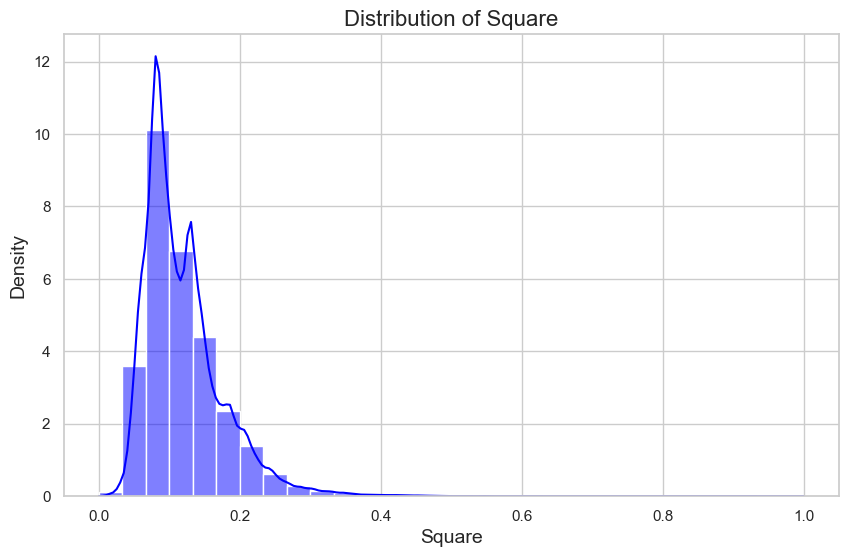

In [34]:
# Set the style of seaborn
sns.set_theme(style="whitegrid")

# Plotting the distribution of 'DOM'
plt.figure(figsize=(10, 6))
sns.histplot(X['square'], bins=30, kde=True, color='blue', stat='density')

# Adding titles and labels
plt.title('Distribution of Square', fontsize=16)
plt.xlabel('Square', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Show the plot
plt.show()

In [44]:
np.log10(X['square']).skew()

/opt/anaconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/pandas/core/nanops.py:1256: RuntimeWarning: invalid value encountered in subtract
  adjusted = values - mean


nan

/opt/anaconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


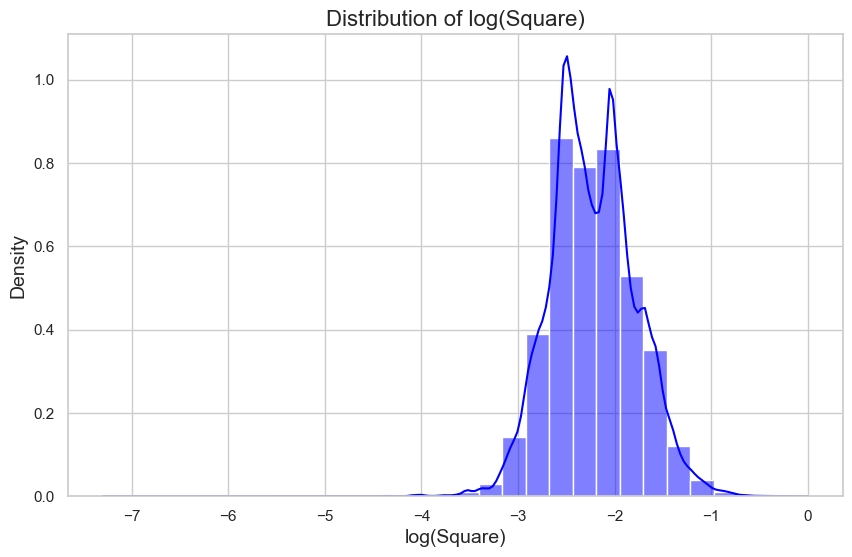

In [36]:
# Set the style of seaborn
sns.set_theme(style="whitegrid")

# Plotting the distribution of 'DOM'
plt.figure(figsize=(10, 6))
sns.histplot(np.log(X['square']), bins=30, kde=True, color='blue', stat='density')

# Adding titles and labels
plt.title('Distribution of log(Square)', fontsize=16)
plt.xlabel('log(Square)', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Show the plot
plt.show()

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X.head()

,const,DOM,followers,square,livingRoom,drawingRoom,kitchen,bathRoom,constructionTime,ladderRatio,...,district_10.0,district_11.0,district_12.0,district_13.0,floorType_0.0,floorType_1.0,floorType_3.0,floorType_4.0,square_2,constructionTime_2
0,1.0,0.872912,0.092738,0.195422,0.250,0.2,0.333333,0.142857,0.833333,2.028094e-08,...,0,0,0,0,0,0,1,0,0.038190,0.694444
1,1.0,0.538186,0.110236,0.197604,0.250,0.4,0.333333,0.285714,0.818182,6.523868e-08,...,0,0,0,0,0,0,1,0,0.039047,0.669421
2,1.0,0.757757,0.041995,0.301329,0.375,0.4,0.333333,0.428571,0.833333,4.855436e-08,...,0,0,0,0,0,0,0,0,0.090799,0.694444
3,1.0,0.575179,0.120735,0.200164,0.375,0.2,0.333333,0.142857,0.878788,2.587568e-08,...,0,0,0,0,1,0,0,0,0.040066,0.772268
4,1.0,0.552506,0.250219,0.116387,0.250,0.2,0.333333,0.142857,0.151515,3.187004e-08,...,0,0,0,0,0,0,0,0,0.013546,0.022957


In [49]:
X = df.drop(['price', 'totalPrice'], axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

# Add constant for intercept
X_train = sm.add_constant(X_train)

# Fit the model
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     8389.
Date:                Mon, 07 Apr 2025   Prob (F-statistic):               0.00
Time:                        15:42:12   Log-Likelihood:             2.2271e+05
No. Observations:              210438   AIC:                        -4.453e+05
Df Residuals:                  210394   BIC:                        -4.449e+05
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0785      0.003     25.783      0.000       0.073       0.084
DOM                         1.0151      0.010    104.928      0.000       0.996       1.034
followers                   0.5704      0.007     77.273      0.000       0.556       0.585
square                     -0.2383      0.007    -34.705      0.000      -0.252      -0.225
livingRoom                  0.0229      0.003      7.410      0.000       0.017       0.029
drawingRoom                -0.0067      0.002     -2.895      0.004      -0.011      -0.002
kitchen                     0.0677      0.006     12.100      0.000       0.057       0.079
bathRoom                    0.0616      0.004     13.731      0.000       0.053       0.070
constructionTime           -0.0143      0.002     -6.928      0.000      -0.018      -0.010
ladderRatio                 0.0878      0.059      1.479      0.139      -0.029       0.204
communityAverage            0.7020      0.003    267.954      0.000       0.697       0.707
tradeTime_month_sin         0.0160      0.001     31.046      0.000       0.015       0.017
tradeTime_month_cos         0.0137      0.001     25.899      0.000       0.013       0.015
floorHeight                -0.0058      0.001     -4.157      0.000      -0.009      -0.003
buildingType_1.0           -0.0084      0.001    -13.488      0.000      -0.010      -0.007
buildingType_2.0            0.0515      0.019      2.754      0.006       0.015       0.088
buildingType_3.0           -0.0080      0.001    -12.557      0.000      -0.009      -0.007
renovationCondition_1.0    -0.0748      0.000   -167.470      0.000      -0.076      -0.074
renovationCondition_2.0    -0.0233      0.001    -15.863      0.000      -0.026      -0.020
renovationCondition_3.0    -0.0032      0.000     -6.362      0.000      -0.004      -0.002
buildingStructure_1.0       0.0159      0.015      1.033      0.302      -0.014       0.046
buildingStructure_2.0      -0.0009      0.001     -1.178      0.239      -0.002       0.001
buildingStructure_3.0       0.1221      0.016      7.765      0.000       0.091       0.153
buildingStructure_4.0      -0.0066      0.001     -5.775      0.000      -0.009      -0.004
buildingStructure_5.0      -0.0069      0.008     -0.822      0.411      -0.023       0.009
elevator_1.0                0.0047      0.001      5.863      0.000       0.003       0.006
fiveYearsProperty_1.0      -0.0211      0.000    -52.176      0.000      -0.022      -0.020
subway_1.0                  0.0037      0.000      9.031      0.000       0.003       0.005
district_2.0               -0.0002      0.001     -0.155      0.877      -0.002       0.002
district_3.0               -0.0039      0.003     -1.351      0.177      -0.009       0.002
district_4.0               -0.0057      0.001  

In [56]:
X_test = sm.add_constant(X_test)
y_pred = model.predict(X_test)

In [57]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

r2_score(y_test, y_pred)

0.6270407159391813

In [84]:
from sklearn.metrics import mean_squared_log_error

In [85]:
np.sqrt(mean_squared_log_error(y_test, y_pred))

ValueError: Mean Squared Logarithmic Error cannot be used when targets contain negative values.

In [58]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.08413362809409551

In [62]:
df_dist = pd.read_csv('cleaned_dist_en_mc_scaled.csv')

In [64]:
df_dist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314087 entries, 0 to 314086
Data columns (total 46 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   DOM                      314087 non-null  float64
 1   followers                314087 non-null  float64
 2   totalPrice               314087 non-null  float64
 3   square                   314087 non-null  float64
 4   livingRoom               314087 non-null  float64
 5   drawingRoom              314087 non-null  float64
 6   kitchen                  314087 non-null  float64
 7   bathRoom                 314087 non-null  float64
 8   constructionTime         314087 non-null  float64
 9   ladderRatio              314087 non-null  float64
 10  communityAverage         314087 non-null  float64
 11  tradeTime_month_sin      314087 non-null  float64
 12  tradeTime_month_cos      314087 non-null  float64
 13  floorHeight              314087 non-null  float64
 14  pric

In [65]:
X = df_dist.drop(['price', 'totalPrice'], axis=1)
y = df_dist['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

# Add constant for intercept
X_train = sm.add_constant(X_train)

# Fit the model
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     8224.
Date:                Tue, 08 Apr 2025   Prob (F-statistic):               0.00
Time:                        10:12:39   Log-Likelihood:             2.2291e+05
No. Observations:              210438   AIC:                        -4.457e+05
Df Residuals:                  210393   BIC:                        -4.453e+05
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0890      0.003     28.845      0.000       0.083       0.095
DOM                         1.0172      0.010    105.237      0.000       0.998       1.036
followers                   0.5694      0.007     77.218      0.000       0.555       0.584
square                     -0.2506      0.007    -36.385      0.000      -0.264      -0.237
livingRoom                  0.0270      0.003      8.734      0.000       0.021       0.033
drawingRoom                -0.0045      0.002     -1.944      0.052      -0.009    3.75e-05
kitchen                     0.0689      0.006     12.324      0.000       0.058       0.080
bathRoom                    0.0618      0.004     13.783      0.000       0.053       0.071
constructionTime           -0.0052      0.002     -2.489      0.013      -0.009      -0.001
ladderRatio                 0.0865      0.059      1.458      0.145      -0.030       0.203
communityAverage            0.6818      0.003    243.355      0.000       0.676       0.687
tradeTime_month_sin         0.0159      0.001     31.008      0.000       0.015       0.017
tradeTime_month_cos         0.0136      0.001     25.792      0.000       0.013       0.015
floorHeight                -0.0056      0.001     -3.994      0.000      -0.008      -0.003
distance                   -0.0514      0.003    -20.187      0.000      -0.056      -0.046
buildingType_1.0           -0.0104      0.001    -16.532      0.000      -0.012      -0.009
buildingType_2.0            0.0498      0.019      2.666      0.008       0.013       0.086
buildingType_3.0           -0.0092      0.001    -14.322      0.000      -0.010      -0.008
renovationCondition_1.0    -0.0750      0.000   -168.101      0.000      -0.076      -0.074
renovationCondition_2.0    -0.0231      0.001    -15.732      0.000      -0.026      -0.020
renovationCondition_3.0    -0.0034      0.000     -6.895      0.000      -0.004      -0.002
buildingStructure_1.0       0.0229      0.015      1.489      0.137      -0.007       0.053
buildingStructure_2.0      -0.0009      0.001     -1.211      0.226      -0.002       0.001
buildingStructure_3.0       0.1247      0.016      7.942      0.000       0.094       0.155
buildingStructure_4.0      -0.0062      0.001     -5.497      0.000      -0.008      -0.004
buildingStructure_5.0      -0.0048      0.008     -0.578      0.563      -0.021       0.012
elevator_1.0                0.0052      0.001      6.575      0.000       0.004       0.007
fiveYearsProperty_1.0      -0.0215      0.000    -53.152      0.000      -0.022      -0.021
subway_1.0                  0.0027      0.000      6.414      0.000       0.002       0.003
district_2.0               -0.0013      0.001     -1.153      0.249      -0.004       0.001
district_3.0                0.0033      0.003  

In [66]:
X_test = sm.add_constant(X_test)
y_pred = model.predict(X_test)

In [67]:
r2_score(y_test, y_pred)

0.6278631266089253

In [68]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.0840408155774856

In [69]:
from matplotlib import pyplot as plt      
from sklearn.cluster import KMeans  

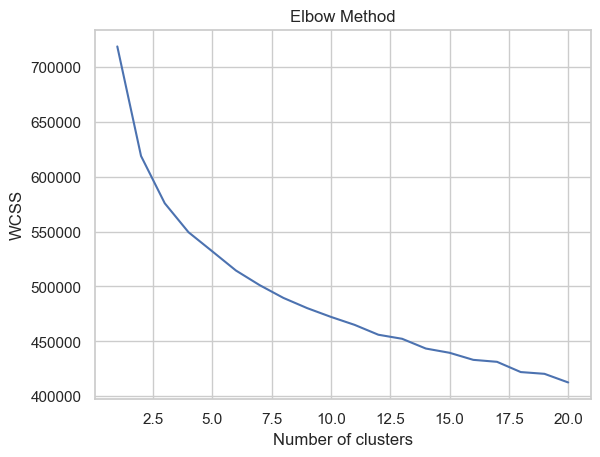

In [72]:
wcss = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 21), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [74]:
X_c = df_dist.drop(['price'], axis=1)

In [75]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X_c)

In [87]:
df_dist['cluster'] = pred_y

In [77]:
df_dist.head()

,DOM,followers,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,constructionTime,ladderRatio,...,district_9.0,district_10.0,district_11.0,district_12.0,district_13.0,floorType_0.0,floorType_1.0,floorType_3.0,floorType_4.0,cluster
0,0.872912,0.092738,0.084675,0.195422,0.250,0.2,0.333333,0.142857,0.833333,2.028094e-08,...,0,0,0,0,0,0,0,1,0,0
1,0.538186,0.110236,0.117329,0.197604,0.250,0.4,0.333333,0.285714,0.818182,6.523868e-08,...,0,0,0,0,0,0,0,1,0,0
2,0.757757,0.041995,0.210188,0.301329,0.375,0.4,0.333333,0.428571,0.833333,4.855436e-08,...,0,0,0,0,0,0,0,0,0,3
3,0.575179,0.120735,0.060695,0.200164,0.375,0.2,0.333333,0.142857,0.878788,2.587568e-08,...,0,0,0,0,0,1,0,0,0,0
4,0.552506,0.250219,0.079981,0.116387,0.250,0.2,0.333333,0.142857,0.151515,3.187004e-08,...,0,0,0,0,0,0,0,0,0,2


In [78]:
cluster_types = pd.get_dummies(df_dist['cluster'], prefix='cluster', dtype=int)

In [79]:
df_dist.drop(['cluster'], axis=1, inplace=True)

In [81]:
df_dist = df_dist.join(cluster_types)

In [101]:
df_dist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314087 entries, 0 to 314086
Data columns (total 51 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   DOM                      314087 non-null  float64
 1   followers                314087 non-null  float64
 2   totalPrice               314087 non-null  float64
 3   square                   314087 non-null  float64
 4   livingRoom               314087 non-null  float64
 5   drawingRoom              314087 non-null  float64
 6   kitchen                  314087 non-null  float64
 7   bathRoom                 314087 non-null  float64
 8   constructionTime         314087 non-null  float64
 9   ladderRatio              314087 non-null  float64
 10  communityAverage         314087 non-null  float64
 11  tradeTime_month_sin      314087 non-null  float64
 12  tradeTime_month_cos      314087 non-null  float64
 13  floorHeight              314087 non-null  float64
 14  pric

In [102]:
X = df_dist.drop(['price', 'totalPrice'], axis=1)
y = df_dist['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

# Add constant for intercept
X_train = sm.add_constant(X_train)

# Fit the model
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     7541.
Date:                Tue, 08 Apr 2025   Prob (F-statistic):               0.00
Time:                        12:24:36   Log-Likelihood:             2.2293e+05
No. Observations:              210438   AIC:                        -4.458e+05
Df Residuals:                  210389   BIC:                        -4.453e+05
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    3.355e+10   2.72e+10      1.232      0.218   -1.98e+10    8.69e+10
DOM                         1.0064      0.012     83.004      0.000       0.983       1.030
followers                   0.5737      0.008     72.618      0.000       0.558       0.589
square                     -0.2496      0.007    -36.207      0.000      -0.263      -0.236
livingRoom                  0.0264      0.003      8.521      0.000       0.020       0.032
drawingRoom                -0.0044      0.002     -1.925      0.054      -0.009    7.94e-05
kitchen                     0.0689      0.006     12.326      0.000       0.058       0.080
bathRoom                    0.0619      0.004     13.820      0.000       0.053       0.071
constructionTime           -0.0055      0.002     -2.596      0.009      -0.010      -0.001
ladderRatio                 0.0859      0.059      1.448      0.148      -0.030       0.202
communityAverage            0.6815      0.003    242.748      0.000       0.676       0.687
tradeTime_month_sin         0.0159      0.001     31.007      0.000       0.015       0.017
tradeTime_month_cos         0.0136      0.001     25.806      0.000       0.013       0.015
floorHeight                -0.0055      0.001     -3.892      0.000      -0.008      -0.003
distance                   -0.0519      0.003    -20.341      0.000      -0.057      -0.047
buildingType_1.0           -0.0121      0.003     -3.828      0.000      -0.018      -0.006
buildingType_2.0            0.0490      0.019      2.626      0.009       0.012       0.086
buildingType_3.0           -0.0097      0.001    -14.560      0.000      -0.011      -0.008
renovationCondition_1.0    -0.0771      0.001   -134.168      0.000      -0.078      -0.076
renovationCondition_2.0    -0.0230      0.001    -15.664      0.000      -0.026      -0.020
renovationCondition_3.0    -0.0029      0.001     -5.818      0.000      -0.004      -0.002
buildingStructure_1.0       0.0231      0.015      1.498      0.134      -0.007       0.053
buildingStructure_2.0       0.0004      0.001      0.509      0.611      -0.001       0.002
buildingStructure_3.0       0.1258      0.016      8.008      0.000       0.095       0.157
buildingStructure_4.0      -0.0051      0.001     -4.318      0.000      -0.007      -0.003
buildingStructure_5.0      -0.0036      0.008     -0.437      0.662      -0.020       0.013
elevator_1.0                0.0011      0.001      0.788      0.431      -0.002       0.004
fiveYearsProperty_1.0      -0.0215      0.000    -53.161      0.000      -0.022      -0.021
subway_1.0                  0.0027      0.000      6.561      0.000       0.002       0.004
district_2.0               -0.0014      0.001     -1.255      0.209      -0.004       0.001
district_3.0                0.0035      0.003  

In [83]:
df_dist.to_csv('cleaned_clustered.csv', index=False)

In [86]:
from sklearn.metrics import mean_absolute_error

In [88]:
df_dist.describe()

,DOM,followers,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,constructionTime,ladderRatio,...,district_13.0,floorType_0.0,floorType_1.0,floorType_3.0,floorType_4.0,cluster_0,cluster_1,cluster_2,cluster_3,cluster
count,314087.000000,314087.000000,314087.000000,314087.000000,314087.000000,314087.000000,314087.000000,314087.000000,314087.000000,3.140870e+05,...,314087.000000,314087.000000,314087.000000,314087.000000,314087.000000,314087.000000,314087.000000,314087.000000,314087.000000,314087.000000
mean,0.009876,0.014656,0.070998,0.119292,0.250618,0.233933,0.331544,0.169118,0.746840,6.404259e-06,...,0.028826,0.079090,0.202055,0.220732,0.117566,0.263414,0.161831,0.264229,0.310525,1.621866
std,0.022311,0.029910,0.045762,0.056734,0.095916,0.103608,0.034461,0.060635,0.128906,2.523419e-03,...,0.167319,0.269879,0.401534,0.414741,0.322094,0.440486,0.368296,0.440923,0.462709,1.176024
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.002983,0.000000,0.041817,0.079889,0.125000,0.200000,0.333333,0.142857,0.666667,2.357784e-08,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.002983,0.004374,0.059981,0.105559,0.250000,0.200000,0.333333,0.142857,0.772727,3.187004e-08,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,0.003580,0.015748,0.086716,0.144065,0.250000,0.200000,0.333333,0.142857,0.833333,4.855436e-08,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [106]:
metrics = {}

X_1 = df_dist.drop(['price'], axis=1)

for cluster in range(4):
    cluster_data = X_1[X_1["cluster"] == cluster]
    y_true = df_dist[df_dist["cluster"] == cluster]["price"]
    y_pred = model.predict(cluster_data)  # Using mean price as naive prediction
    
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    # rmsle = np.sqrt(mean_squared_log_error(y_true, y_pred))
    
    metrics[cluster] = {"MAE": mae, "RMSE": rmse, "R²": r2}

In [107]:
# Print cluster-wise metrics
for cluster, values in metrics.items():
    print(f"Cluster {cluster+1} Metrics:")
    for metric, value in values.items():
        print(f"  {metric}: {value}")
    print()

Cluster 1 Metrics:
  MAE: 33215396719.752705
  RMSE: 33224351844.170876
  R²: -6.618674565381642e+22

Cluster 2 Metrics:
  MAE: 33417257749.273426
  RMSE: 33419833193.32456
  R²: -8.101301808109996e+22

Cluster 3 Metrics:
  MAE: 33126701178.75038
  RMSE: 33136948943.813618
  R²: -4.717452041630258e+22

Cluster 4 Metrics:
  MAE: 33195117518.22704
  RMSE: 33204210162.865147
  R²: -6.383386910090576e+22



In [109]:
y_pred = model.predict(X_1)

In [110]:
y_true = df_dist['price']

In [113]:
np.sqrt(mean_squared_error(y_true, y_pred))

33226763113.730812